In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
df6012 = web.DataReader('6012.KL', data_source='yahoo', start='2010-09-01',end='2020-05-01')

In [3]:
df6012['Difference'] = df6012['Open'] - df6012['Close']
df6012.head()

,High,Low,Open,Close,Volume,Adj Close,Difference
Date,,,,,,,
2010-09-01,5.47,5.30,5.44,5.38,17694800.0,3.382857,0.06
2010-09-02,5.42,5.34,5.40,5.37,7574100.0,3.376569,0.03
2010-09-03,5.38,5.35,5.36,5.38,4135900.0,3.382857,-0.02
2010-09-06,5.40,5.36,5.38,5.40,2864000.0,3.395431,-0.02
2010-09-07,5.42,5.38,5.38,5.42,1063500.0,3.408008,-0.04


In [4]:
df6012.tail()

,High,Low,Open,Close,Volume,Adj Close,Difference
Date,,,,,,,
2020-03-06,5.45,5.36,5.37,5.43,1813100.0,5.43,-0.06
2020-03-09,5.46,5.30,5.38,5.31,3013200.0,5.31,0.07
2020-03-10,5.37,5.25,5.29,5.25,3148600.0,5.25,0.04
2020-03-11,5.31,5.21,5.27,5.27,3875400.0,5.27,0.00
2020-03-12,5.31,5.20,5.25,5.25,2038200.0,5.25,0.00


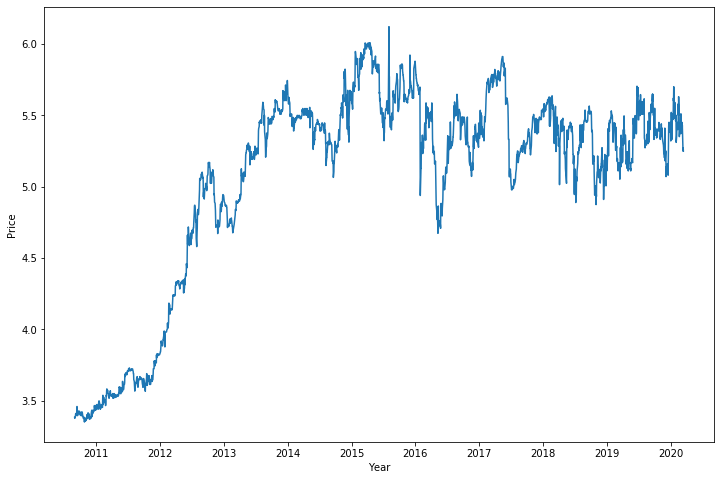

In [5]:
plt.figure(figsize = (12,8))
plt.plot(df6012['Adj Close'])
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [6]:
df6012.to_csv('maxis.csv')

In [6]:
dfPre = []
dfPre = df6012[['Adj Close']]

In [7]:
print(dfPre.head())

            Adj Close
Date                 
2010-09-01   3.382857
2010-09-02   3.376569
2010-09-03   3.382857
2010-09-06   3.395431
2010-09-07   3.408008


In [8]:
forecast_out = 30 #predict n days into the future, in this case, 30
dfPre['Prediction'] = dfPre[['Adj Close']].shift(-forecast_out)
print(dfPre.head())

            Adj Close  Prediction
Date                             
2010-09-01   3.382857    3.414202
2010-09-02   3.376569    3.388674
2010-09-03   3.382857    3.388674
2010-09-06   3.395431    3.382294
2010-09-07   3.408008    3.375912


C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
X = np.array(dfPre.drop(['Prediction'], 1))
len(X)

2352

In [17]:
#reserving 60 data for testing
X_new = X[0:2292]
len(X_new) + 60

2352

In [18]:
X_new[0:10]

array([[3.38285732],
       [3.37656903],
       [3.38285732],
       [3.39543056],
       [3.40800762],
       [3.39543056],
       [3.39543056],
       [3.42058444],
       [3.45887375],
       [3.45887375]])

In [19]:
y = np.array(dfPre['Prediction'])
y_new = y[:-60]
len(y_new)

2292

In [20]:
y_new[0:10]

array([3.41420197, 3.38867354, 3.38867354, 3.38229418, 3.37591195,
       3.37591195, 3.38229418, 3.37591195, 3.35038543, 3.38229418])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2)

In [22]:
y = np.array(dfPre['Prediction'])
y = y[:-forecast_out]
print(y)
len(y)

[3.41420197 3.38867354 3.38867354 ... 5.25       5.26999998 5.25      ]


2322

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_pre = lr.predict(X[2322:2352])
print("Predicted last 30 days")
print(y_pre)

Predicted last 30 days
[5.31855361 5.36430906 5.43751742 5.43751742 5.40091324 5.44666825
 5.41006407 5.40091324 5.56563207 5.4924237  5.61138752 5.47412161
 5.35515779 5.37345988 5.40091324 5.43751742 5.39176198 5.44666825
 5.37345988 5.50157496 5.42836616 5.44666825 5.38261115 5.44666825
 5.38261115 5.42836616 5.31855361 5.26364733 5.28194942 5.26364733]


In [26]:
confidence = lr.score(X_test, y_test)
print("Confidence Score: ", confidence)

Confidence Score:  0.8931291755403538


In [27]:
x_forecast = np.array(dfPre.drop(['Prediction'], 1))[-forecast_out:]
print("Actual last 30 days: ")
print(x_forecast)

Actual last 30 days: 
[[5.30999994]
 [5.36000013]
 [5.44000006]
 [5.44000006]
 [5.4000001 ]
 [5.44999981]
 [5.40999985]
 [5.4000001 ]
 [5.57999992]
 [5.5       ]
 [5.63000011]
 [5.48000002]
 [5.3499999 ]
 [5.36999989]
 [5.4000001 ]
 [5.44000006]
 [5.38999987]
 [5.44999981]
 [5.36999989]
 [5.51000023]
 [5.42999983]
 [5.44999981]
 [5.38000011]
 [5.44999981]
 [5.38000011]
 [5.42999983]
 [5.30999994]
 [5.25      ]
 [5.26999998]
 [5.25      ]]


Text(0, 0.5, 'Price')

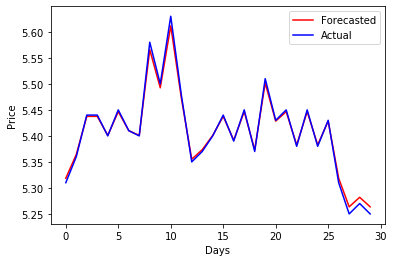

In [28]:
plt.plot(y_pre, color='r')
plt.plot(x_forecast, color='b')
plt.legend(['Forecasted', 'Actual'])
plt.xlabel("Days")
plt.ylabel("Price")